In [4]:
import numpy as np
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import re
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from pandas.plotting import table
import dataframe_image as dfi

In [5]:
df = pd.read_csv('output_new_refined_bootstap.csv').drop(['WLTP (km)','NEDC (km)'], axis = 1)

In [6]:
train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 101)

In [7]:
train_set

,Model year,Type of rechargeable battery,Battery capacity (kWh),Number of cells,Number of modules,Voltage (V),Cooling,Top Speed (km/h),Acceleration from 0 to 100 km/h (s),Materials,Curb weight (kg),GVWR (kg),Body style,EPA (km)
218,2017,Lithium-Ion,100.0,8256.0,16.0,400.0,Water-based coolant circulation,249.930502,3.8,Aluminiumhigh-strength boron steel,2214.998598,2693.996286,Sedan,538.967966
193,2019,Lithium-Ion,100.0,8256.0,16.0,400.0,Water-based coolant circulation,249.930502,4.6,Extruded aluminium with boron steel,2553.999651,3078.996104,Sport utility vehicle (SUV),527.863520
213,2018,Lithium-Ion,75.0,5880.0,14.0,302.0,Water-based coolant circulation,224.985732,4.4,Aluminiumhigh-strength boron steel,2026.998322,2589.996712,Sedan,416.819060
182,2020,Lithium-Ion,100.0,8256.0,16.0,400.0,Water-based coolant circulation,249.930502,4.6,Extruded aluminium with boron steel,2553.999651,3078.996104,Sport utility vehicle (SUV),527.863520
221,2017,Lithium-Ion,75.0,5880.0,14.0,302.0,Water-based coolant circulation,224.985732,4.4,Aluminiumhigh-strength boron steel,2026.998322,2589.996712,Sedan,416.819060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40,2016,Lithium-Ion,24.0,97.0,NaN,364.0,Air convectionWater-based coolant circulation,136.954834,NaN,Steel,1354.997238,NaN,Hatchback,135.023626
75,2020,Li-Ion Polymer,64.0,294.0,3.0,356.0,Water-based coolant circulation,167.049492,7.8,Advanced High Strength SteelAluminium,1812.000250,2229.998886,Crossover,NaN
87,2021,Lithium-Ion,35.5,NaN,NaN,355.0,Water-based coolant circulation,140.012580,9.7,Steel,1674.997322,2119.000387,Sport utility vehicle (SUV),NaN
63,2020,Li-Ion Polymer,39.2,NaN,NaN,319.0,Water-based coolant circulationHeat pipe,154.979442,9.7,-,1535.000687,2019.999397,Sport utility vehicle (SUV),264.887387


In [8]:
dfi.export(train_set, 'train_set.png', max_rows=10)

In [9]:
corr_matrix = train_set.corr()

In [10]:
corr_matrix = pd.DataFrame(corr_matrix['EPA (km)'].sort_values(ascending = False))

In [11]:
corr_matrix

,EPA (km)
EPA (km),1.000000
Battery capacity (kWh),0.903851
Top Speed (km/h),0.794895
Curb weight (kg),0.700261
Number of cells,0.689212
GVWR (kg),0.660311
Model year,0.262227
Voltage (V),0.187789
Number of modules,0.041693
Acceleration from 0 to 100 km/h (s),-0.839817


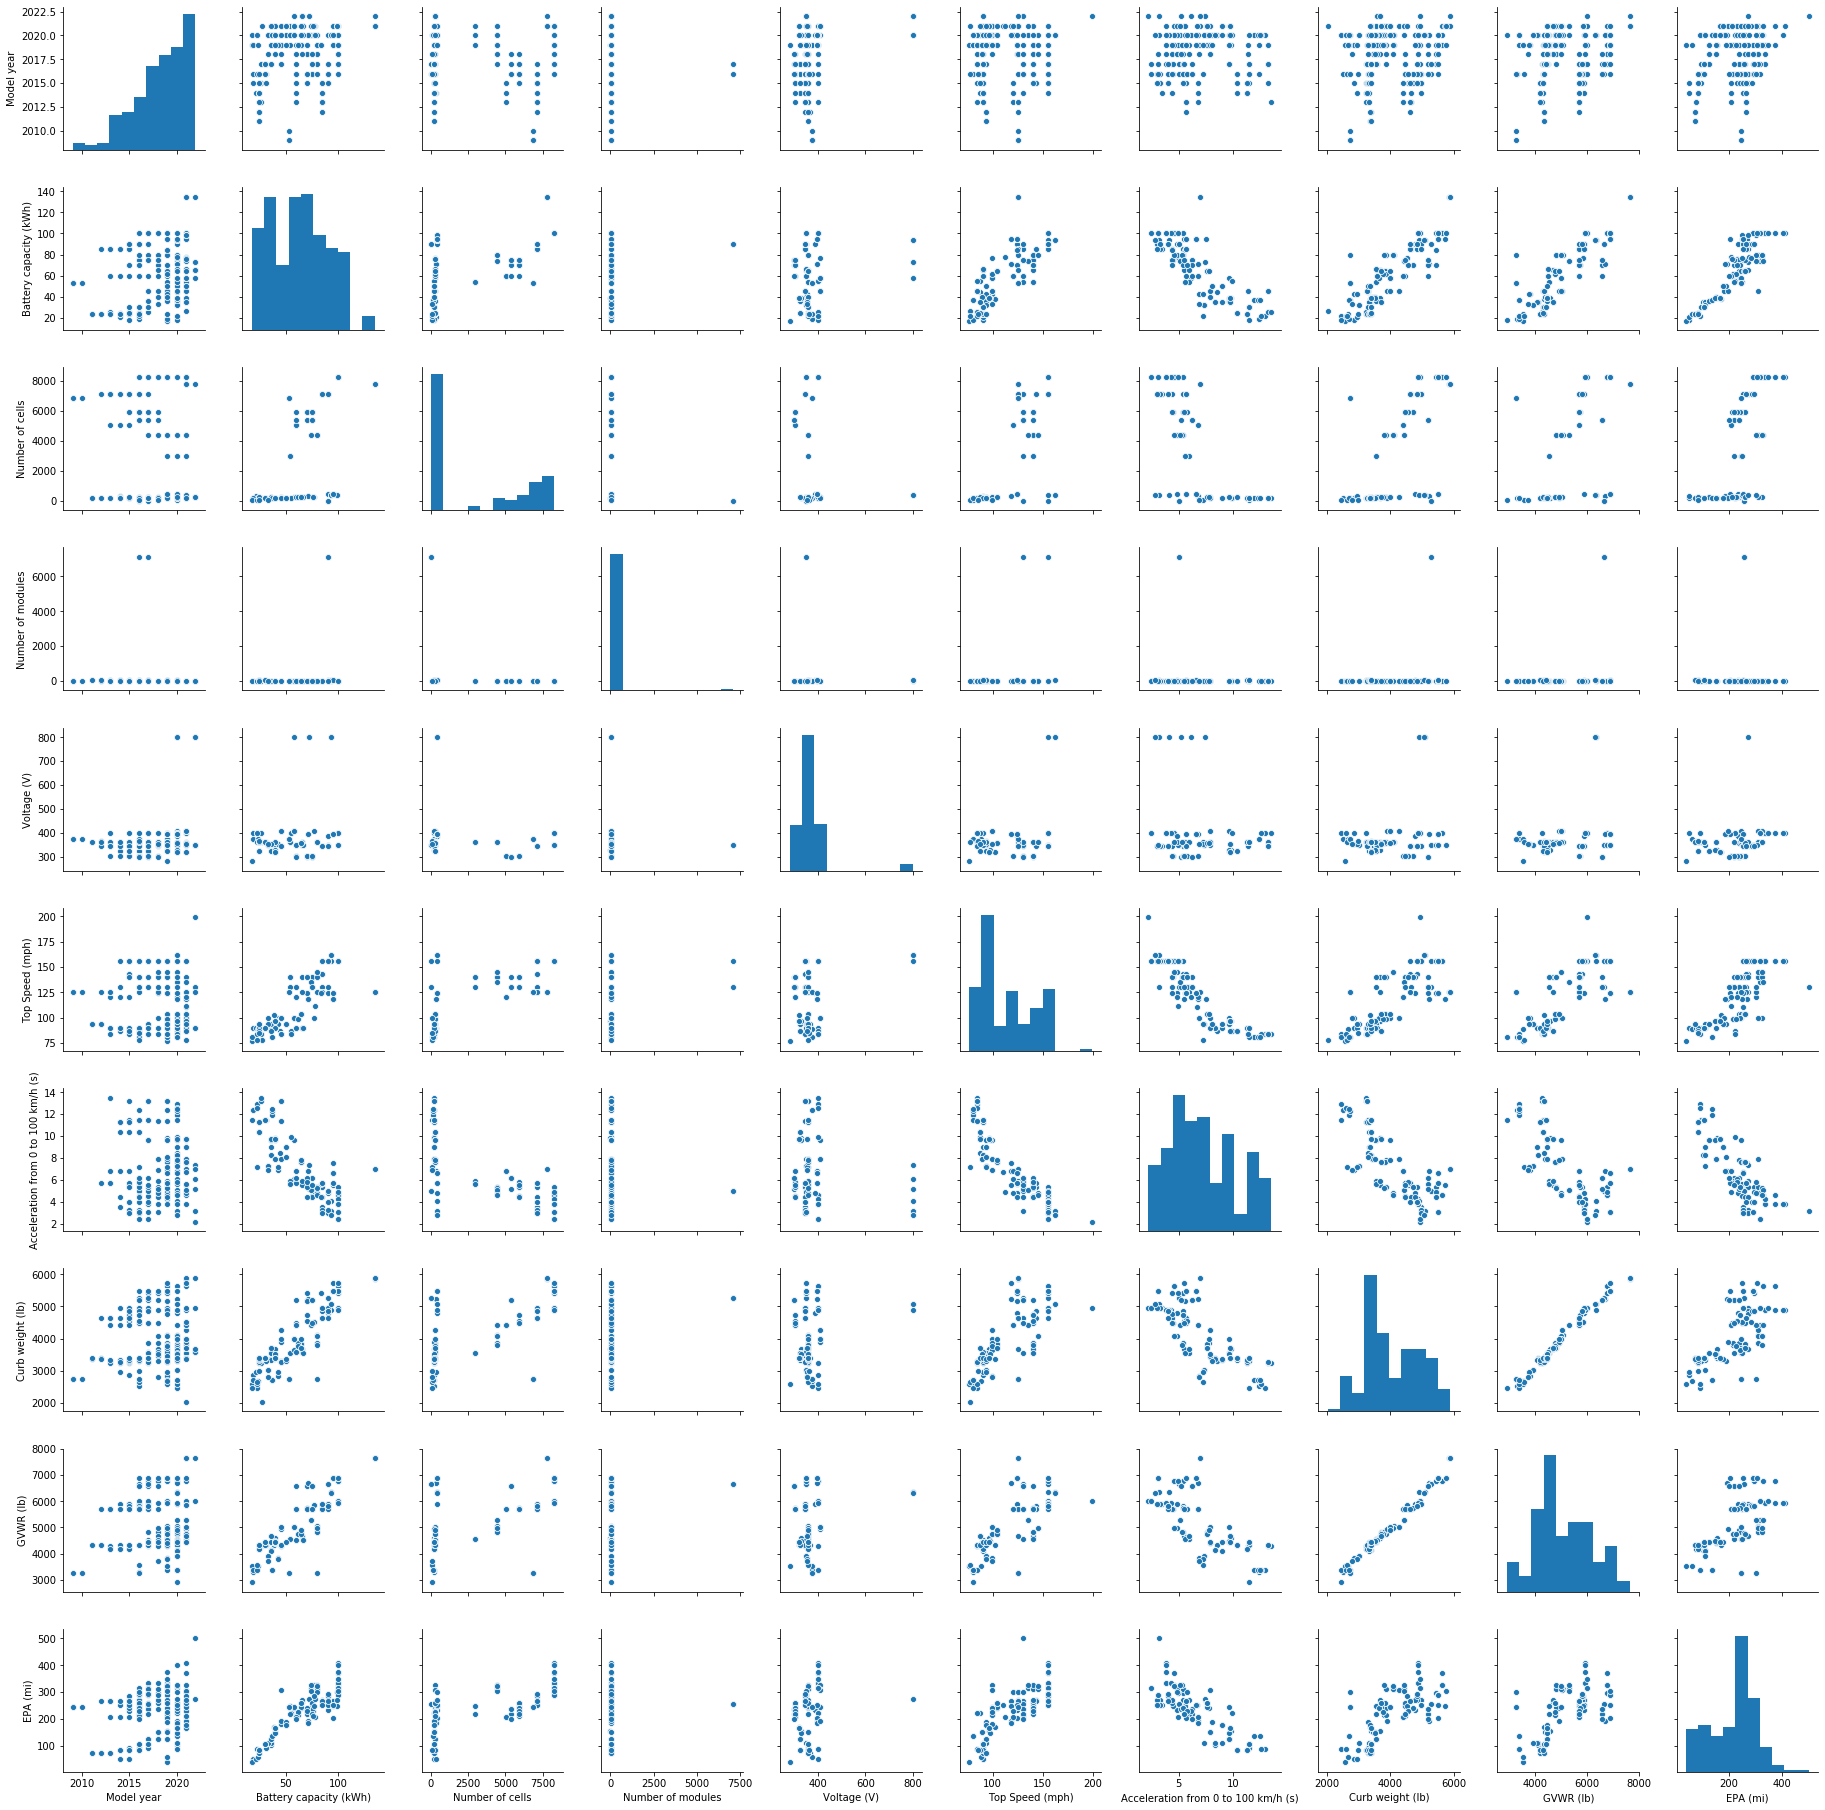

In [9]:
sns.pairplot(train_set)

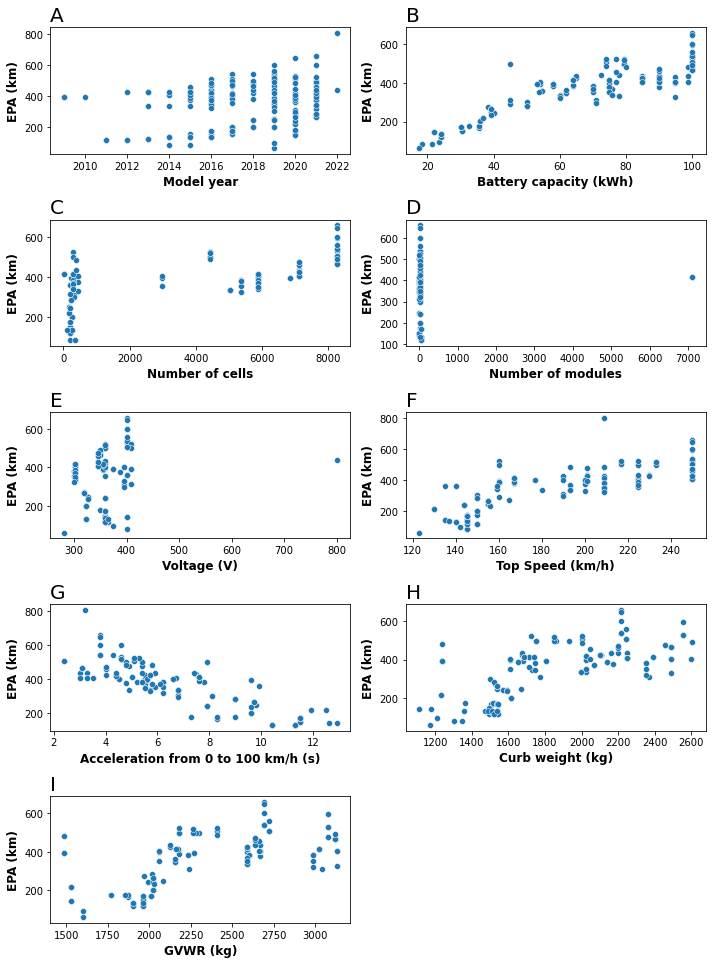

In [12]:
fig = plt.figure(figsize = (10,13.5))

y= 'EPA (km)'
#hue = 'Body style'

x='Model year'
ax1 = fig.add_subplot(5,2,1)
sns.scatterplot(x = train_set[x], y = y, data = train_set, ax = ax1)
plt.xlabel(x, fontweight = 'bold', fontsize = 'large')
plt.ylabel(y, fontweight = 'bold', fontsize = 'large')
plt.title('A', loc='left', fontsize = 20)

x = 'Battery capacity (kWh)'
ax2 = fig.add_subplot(5,2,2)
sns.scatterplot(x = train_set[x], y = y, data = train_set, ax = ax2)
plt.xlabel(x, fontweight = 'bold', fontsize = 'large')
plt.ylabel(y, fontweight = 'bold', fontsize = 'large')
plt.title('B', loc='left', fontsize = 20)

x = 'Number of cells'
ax3 = fig.add_subplot(5,2,3)
sns.scatterplot(x = train_set[x], y = y, data = train_set, ax = ax3)
plt.xlabel(x, fontweight = 'bold', fontsize = 'large')
plt.ylabel(y, fontweight = 'bold', fontsize = 'large')
plt.title('C', loc='left', fontsize = 20)

x = 'Number of modules'
ax4 = fig.add_subplot(5,2,4)
sns.scatterplot(x = train_set[x], y = y, data = train_set, ax = ax4)
plt.xlabel(x, fontweight = 'bold', fontsize = 'large')
plt.ylabel(y, fontweight = 'bold', fontsize = 'large')
plt.title('D', loc='left', fontsize = 20)

x = 'Voltage (V)'
ax5 = fig.add_subplot(5,2,5)
sns.scatterplot(x = train_set[x], y = y, data = train_set, ax = ax5)
plt.xlabel(x, fontweight = 'bold', fontsize = 'large')
plt.ylabel(y, fontweight = 'bold', fontsize = 'large')
plt.title('E', loc='left', fontsize = 20)

x = 'Top Speed (km/h)'
ax6 = fig.add_subplot(5,2,6)
sns.scatterplot(x = train_set[x], y = y, data = train_set, ax = ax6)
plt.xlabel(x, fontweight = 'bold', fontsize = 'large')
plt.ylabel(y, fontweight = 'bold', fontsize = 'large')
plt.title('F', loc='left', fontsize = 20)

x = 'Acceleration from 0 to 100 km/h (s)'
ax7 = fig.add_subplot(5,2,7)
sns.scatterplot(x = train_set[x], y = y, data = train_set, ax = ax7)
plt.xlabel(x, fontweight = 'bold', fontsize = 'large')
plt.ylabel(y, fontweight = 'bold', fontsize = 'large')
plt.title('G', loc='left', fontsize = 20)

x = 'Curb weight (kg)'
ax8 = fig.add_subplot(5,2,8)
sns.scatterplot(x = train_set[x], y = y, data = train_set, ax = ax8)
plt.xlabel(x, fontweight = 'bold', fontsize = 'large')
plt.ylabel(y, fontweight = 'bold', fontsize = 'large')
plt.title('H', loc='left', fontsize = 20)

x = 'GVWR (kg)'
ax9 = fig.add_subplot(5,2,9)
sns.scatterplot(x = train_set[x], y = y, data = train_set, ax = ax9)
plt.xlabel(x, fontweight = 'bold', fontsize = 'large')
plt.ylabel(y, fontweight = 'bold', fontsize = 'large')
plt.title('I', loc='left', fontsize = 20)

fig.tight_layout()

KeyError: 'Top Speed (mph)'

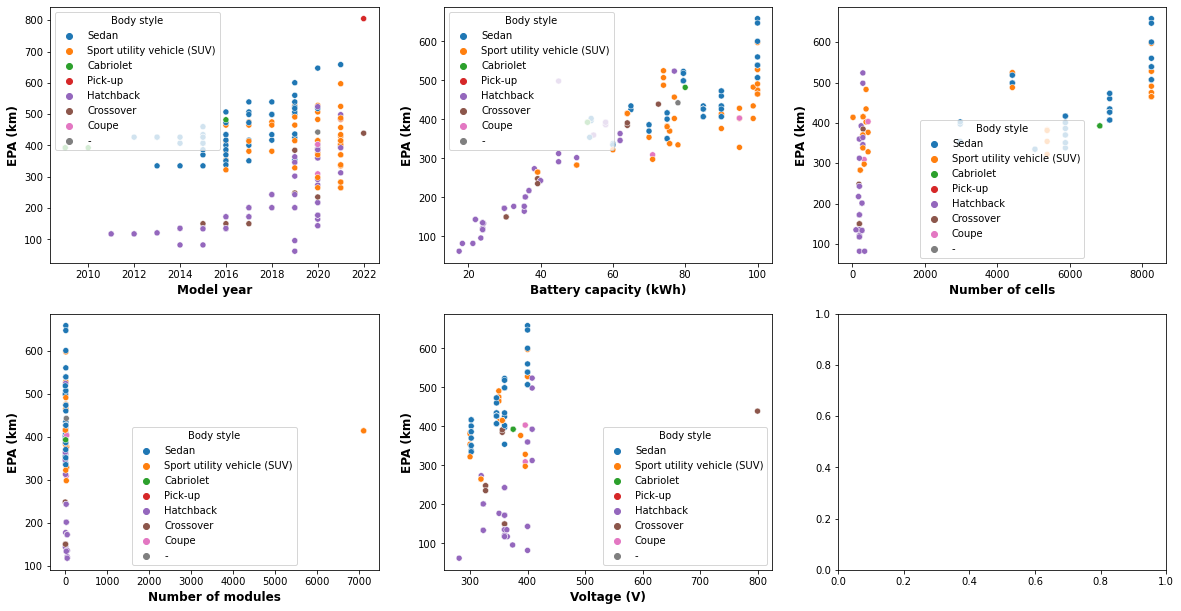

In [13]:
fig = plt.figure(figsize = (20,16))

y='EPA (km)'
hue = 'Body style'

x='Model year'
ax1 = fig.add_subplot(3,3,1)
sns.scatterplot(x = train_set['Model year'], y = y, data = train_set, ax = ax1, hue = hue)
plt.xlabel(x, fontweight = 'bold', fontsize = 'large')
plt.ylabel(y, fontweight = 'bold', fontsize = 'large')

x = 'Battery capacity (kWh)'
ax2 = fig.add_subplot(3,3,2)
sns.scatterplot(x = train_set['Battery capacity (kWh)'], y = y, data = train_set, ax = ax2, hue = hue)
plt.xlabel(x, fontweight = 'bold', fontsize = 'large')
plt.ylabel(y, fontweight = 'bold', fontsize = 'large')

x = 'Number of cells'
ax3 = fig.add_subplot(3,3,3)
sns.scatterplot(x = train_set[x], y = y, data = train_set, ax = ax3, hue = hue)
plt.xlabel(x, fontweight = 'bold', fontsize = 'large')
plt.ylabel(y, fontweight = 'bold', fontsize = 'large')

x = 'Number of modules'
ax4 = fig.add_subplot(3,3,4)
sns.scatterplot(x = train_set[x], y = y, data = train_set, ax = ax4, hue = hue)
plt.xlabel(x, fontweight = 'bold', fontsize = 'large')
plt.ylabel(y, fontweight = 'bold', fontsize = 'large')

x = 'Voltage (V)'
ax5 = fig.add_subplot(3,3,5)
sns.scatterplot(x = train_set[x], y = y, data = train_set, ax = ax5, hue = hue)
plt.xlabel(x, fontweight = 'bold', fontsize = 'large')
plt.ylabel(y, fontweight = 'bold', fontsize = 'large')

x = 'Top Speed (mph)'
ax6 = fig.add_subplot(3,3,6)
sns.scatterplot(x = train_set[x], y = y, data = train_set, ax = ax6, hue = hue)
plt.xlabel(x, fontweight = 'bold', fontsize = 'large')
plt.ylabel(y, fontweight = 'bold', fontsize = 'large')

x = 'Acceleration from 0 to 100 km/h (s)'
ax7 = fig.add_subplot(3,3,7)
sns.scatterplot(x = train_set[x], y = y, data = train_set, ax = ax7, hue = hue)
plt.xlabel(x, fontweight = 'bold', fontsize = 'large')
plt.ylabel(y, fontweight = 'bold', fontsize = 'large')

x = 'Curb weight (lb)'
ax8 = fig.add_subplot(3,3,8)
sns.scatterplot(x = train_set[x], y = y, data = train_set, ax = ax8, hue = hue)
plt.xlabel(x, fontweight = 'bold', fontsize = 'large')
plt.ylabel(y, fontweight = 'bold', fontsize = 'large')

x = 'GVWR (lb)'
ax9 = fig.add_subplot(3,3,9)
sns.scatterplot(x = train_set[x], y = y, data = train_set, ax = ax9, hue = hue)
plt.xlabel(x, fontweight = 'bold', fontsize = 'large')
plt.ylabel(y, fontweight = 'bold', fontsize = 'large')

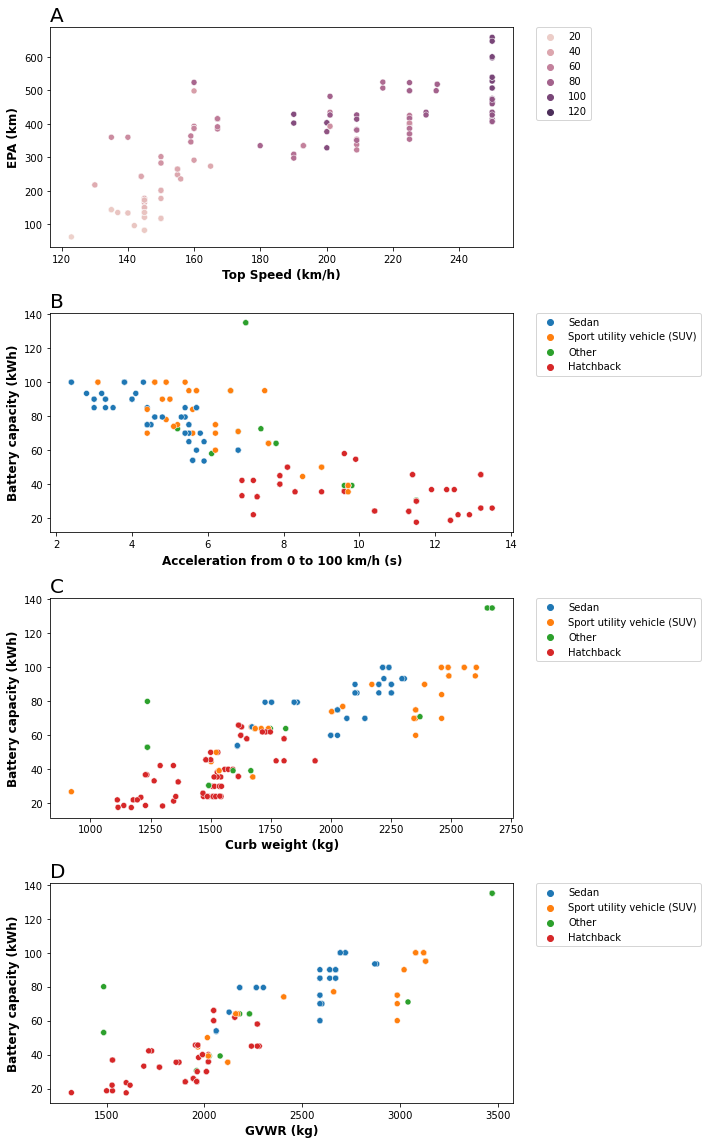

In [30]:
fig = plt.figure(figsize = (10,16))

y='EPA (km)'
hue = 'Battery capacity (kWh)'

x='Top Speed (km/h)'
ax1 = fig.add_subplot(4,1,1)
sns.scatterplot(x = x, y = y, data = train_set, ax = ax1, hue = hue)
plt.xlabel(x, fontweight = 'bold', fontsize = 'large')
plt.ylabel(y, fontweight = 'bold', fontsize = 'large')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('A', loc='left', fontsize = 20)

x='Acceleration from 0 to 100 km/h (s)'
y='Battery capacity (kWh)'
hue = 'Body style'

ax2 = fig.add_subplot(4,1,2)
sns.scatterplot(x = x, y = y, data = train_set, ax = ax2, hue = hue)
plt.xlabel(x, fontweight = 'bold', fontsize = 'large')
plt.ylabel(y, fontweight = 'bold', fontsize = 'large')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('B', loc='left', fontsize = 20)

x='Curb weight (kg)'
y='Battery capacity (kWh)'
#hue = 'Body style'

ax3 = fig.add_subplot(4,1,3)
sns.scatterplot(x = x, y = y, data = train_set, ax = ax3, hue = hue)
plt.xlabel(x, fontweight = 'bold', fontsize = 'large')
plt.ylabel(y, fontweight = 'bold', fontsize = 'large')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('C', loc='left', fontsize = 20)

x='GVWR (kg)'
y='Battery capacity (kWh)'
#hue = 'Body style'

ax4 = fig.add_subplot(4,1,4)
sns.scatterplot(x = x, y = y, data = train_set, ax = ax4, hue = hue)
plt.xlabel(x, fontweight = 'bold', fontsize = 'large')
plt.ylabel(y, fontweight = 'bold', fontsize = 'large')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('D', loc='left', fontsize = 20)

fig.tight_layout()

Text(0.0, 1.0, 'E')

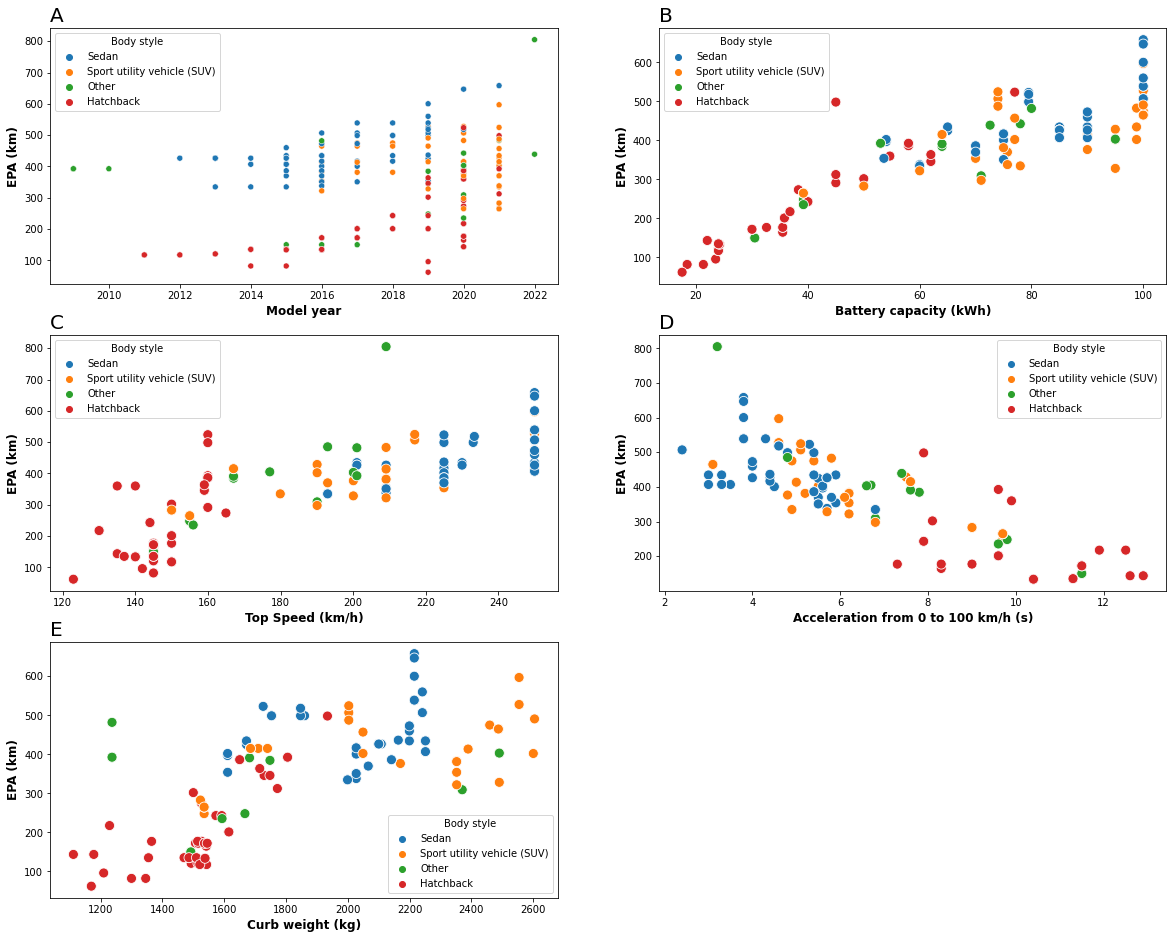

In [29]:
fig = plt.figure(figsize = (20,16))

y='EPA (km)'
hue = 'Body style'

x='Model year'
ax1 = fig.add_subplot(3,2,1)
sns.scatterplot(x = train_set['Model year'], y = y, data = train_set, ax = ax1, hue = hue)
plt.xlabel(x, fontweight = 'bold', fontsize = 'large')
plt.ylabel(y, fontweight = 'bold', fontsize = 'large')
plt.title('A', loc='left', fontsize = 20)

x = 'Battery capacity (kWh)'
ax1 = fig.add_subplot(3,2,2)
sns.scatterplot(x = train_set['Battery capacity (kWh)'], y = y, data = train_set, ax = ax1, hue = hue, s=100)
plt.xlabel(x, fontweight = 'bold', fontsize = 'large')
plt.ylabel(y, fontweight = 'bold', fontsize = 'large')
plt.title('B', loc='left', fontsize = 20)

x = 'Top Speed (km/h)'
ax2 = fig.add_subplot(3,2,3)
sns.scatterplot(x = train_set[x], y = y, data = train_set, ax = ax2, hue = hue, s=100)
plt.xlabel(x, fontweight = 'bold', fontsize = 'large')
plt.ylabel(y, fontweight = 'bold', fontsize = 'large')
plt.title('C', loc='left', fontsize = 20)

x = 'Acceleration from 0 to 100 km/h (s)'
ax3 = fig.add_subplot(3,2,4)
sns.scatterplot(x = train_set[x], y = y, data = train_set, ax = ax3, hue = hue, s=100)
plt.xlabel(x, fontweight = 'bold', fontsize = 'large')
plt.ylabel(y, fontweight = 'bold', fontsize = 'large')
plt.title('D', loc='left', fontsize = 20)

x = 'Curb weight (kg)'
ax4 = fig.add_subplot(3,2,5)
sns.scatterplot(x = train_set[x], y = y, data = train_set, ax = ax4, hue = hue, s=100)
plt.xlabel(x, fontweight = 'bold', fontsize = 'large')
plt.ylabel(y, fontweight = 'bold', fontsize = 'large')
plt.title('E', loc='left', fontsize = 20)

<AxesSubplot:xlabel='Model year', ylabel='EPA (km)'>

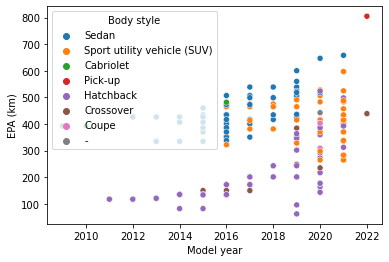

In [16]:
sns.scatterplot(x = train_set['Model year'], y = train_set['EPA (km)'], data = train_set, hue = hue)

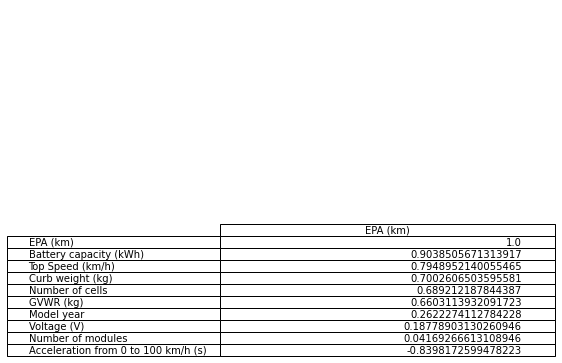

In [17]:
# ax = plt.subplot(111, frame_on=False) # no visible frame
# ax.xaxis.set_visible(False)  # hide the x axis
# ax.yaxis.set_visible(False)  # hide the y axis

# table(ax, corr_matrix)

In [89]:
# corr_matrix.rename(columns = {'EPA (mi)': 'Correlations'}, inplace = True)

In [92]:
# dfi.export(corr_matrix, 'corr_matrix.png')

In [18]:
train_set.columns

Index(['Model year', 'Type of rechargeable battery', 'Battery capacity (kWh)',
       'Number of cells', 'Number of modules', 'Voltage (V)', 'Cooling',
       'Top Speed (km/h)', 'Acceleration from 0 to 100 km/h (s)', 'Materials',
       'Curb weight (kg)', 'GVWR (kg)', 'Body style', 'EPA (km)'],
      dtype='object')

In [19]:
def clean_bodystyle(x):
    if type(x) == str:
        if x in ['Crossover','Pick-up','Cabriolet','Coupe','-', 'Other']:
            return 'Other'
        else:
            return x
        
train_set['Body style'] = train_set['Body style'].apply(lambda x: clean_bodystyle(x))

train_set['Body style'].unique()

C:\Users\Moin\AppData\Local\Temp/ipykernel_18384/3835753152.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['Body style'] = train_set['Body style'].apply(lambda x: clean_bodystyle(x))


array(['Sedan', 'Sport utility vehicle (SUV)', 'Other', 'Hatchback'],
      dtype=object)

[Text(0, 0, 'Sedan'),
 Text(1, 0, 'Sport utility vehicle (SUV)'),
 Text(2, 0, 'Other'),
 Text(3, 0, 'Hatchback')]

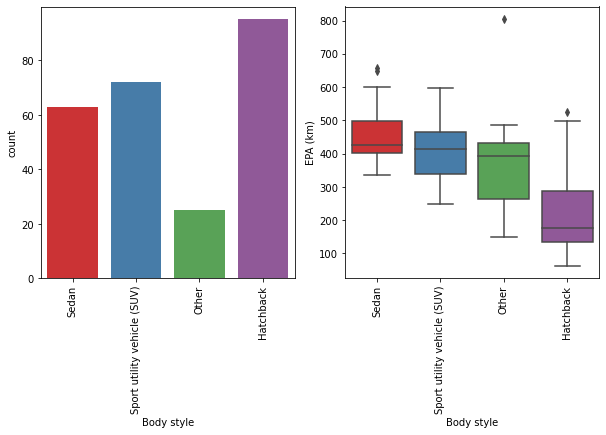

In [21]:
fig = plt.figure(figsize = (10,5))

y='EPA (km)'
hue = 'Body style'

ax1 = fig.add_subplot(1,2,1)
chart = sns.countplot(x='Body style', data = train_set, palette='Set1')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


ax2 = fig.add_subplot(1,2,2)
chart = sns.boxplot(x='Body style',y= y, data = train_set, palette='Set1')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

[Text(0, 0, 'Sport utility vehicle (SUV)'),
 Text(1, 0, 'Sedan'),
 Text(2, 0, 'Hatchback'),
 Text(3, 0, 'Other')]

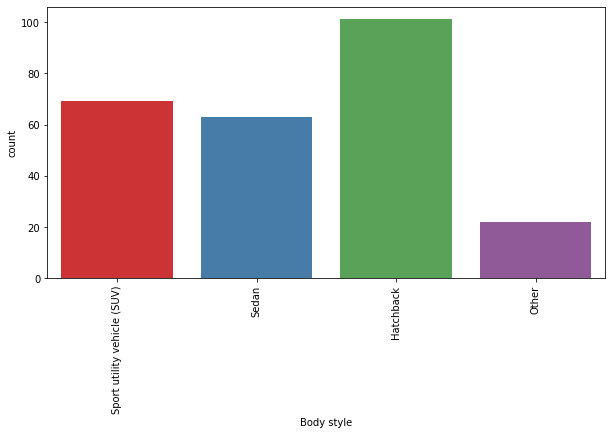

In [131]:
# plt.figure(figsize=(10,5))
# chart = sns.countplot(x='Body style', data = train_set, palette='Set1')
# chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

[Text(0, 0, 'Lithium-Ion'), Text(1, 0, 'Li-Ion Polymer')]

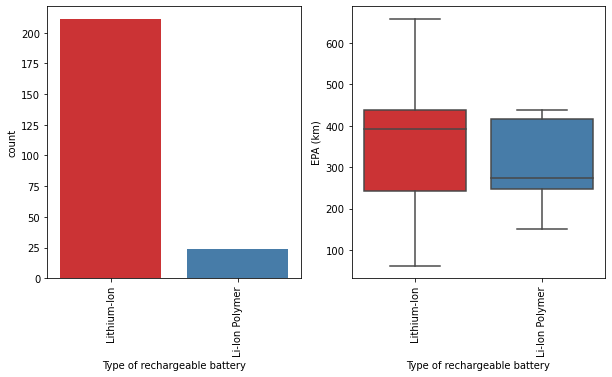

In [22]:
fig = plt.figure(figsize = (10,5))

ax1 = fig.add_subplot(1,2,1)
chart = sns.countplot(x='Type of rechargeable battery', data = train_set, palette='Set1')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

ax2 = fig.add_subplot(1,2,2)
chart = sns.boxplot(x='Type of rechargeable battery',y= y, data = train_set, palette='Set1')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

In [23]:
def clean_cooling(x):
    if type(x) == str:
        if x == 'Water-based coolant circulation':
            return x
        else:
            return 'Other'
        
train_set['Cooling'] = train_set['Cooling'].apply(lambda x: clean_cooling(x))

C:\Users\Moin\AppData\Local\Temp/ipykernel_18384/3404970722.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['Cooling'] = train_set['Cooling'].apply(lambda x: clean_cooling(x))


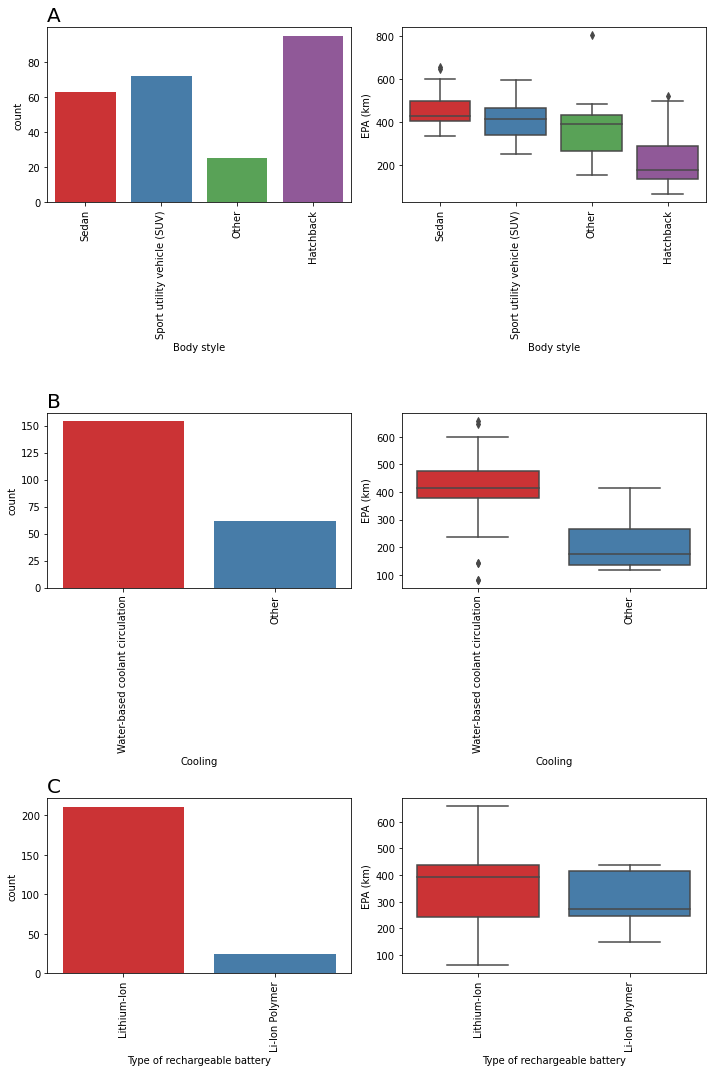

In [24]:
fig = plt.figure(figsize = (10,15))

y='EPA (km)'
hue = 'Body style'

ax1 = fig.add_subplot(3,2,1)
chart = sns.countplot(x='Body style', data = train_set, palette='Set1')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title('A', loc='left', fontsize = 20)

ax2 = fig.add_subplot(3,2,2)
chart = sns.boxplot(x='Body style',y= y, data = train_set, palette='Set1')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

ax3 = fig.add_subplot(3,2,3)
chart = sns.countplot(x='Cooling', data = train_set, palette='Set1')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title('B', loc='left', fontsize = 20)

ax4 = fig.add_subplot(3,2,4)
chart = sns.boxplot(x='Cooling',y= y, data = train_set, palette='Set1')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

ax5 = fig.add_subplot(3,2,5)
chart = sns.countplot(x='Type of rechargeable battery', data = train_set, palette='Set1')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title('C', loc='left', fontsize = 20)

ax6 = fig.add_subplot(3,2,6)
chart = sns.boxplot(x='Type of rechargeable battery',y= y, data = train_set, palette='Set1')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

fig.tight_layout()

In [6]:
def clean_cooling(x):
    if type(x) == str:
        if x == 'Water-based coolant circulation':
            return x
        else:
            return 'Other'
        
train_set['Cooling'] = train_set['Cooling'].apply(lambda x: clean_cooling(x))

C:\Users\Moin\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


[Text(0, 0, 'Water-based coolant circulation'), Text(1, 0, 'Other')]

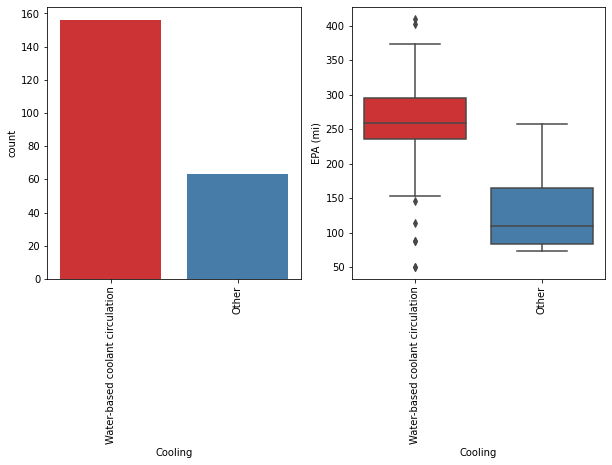

In [149]:
fig = plt.figure(figsize = (10,5))

ax1 = fig.add_subplot(1,2,1)
chart = sns.countplot(x='Cooling', data = train_set, palette='Set1')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

ax2 = fig.add_subplot(1,2,2)
chart = sns.boxplot(x='Cooling',y= 'EPA (mi)', data = train_set, palette='Set1')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

[Text(0, 0, 'SteelAluminium'),
 Text(1, 0, 'StealAluminium'),
 Text(2, 0, 'Aluminiumhigh-strength boron steel'),
 Text(3, 0, 'Extruded aluminium with boron steel'),
 Text(4, 0, 'Steel'),
 Text(5, 0, 'AluminiumHigh tensile strength steel'),
 Text(6, 0, '-'),
 Text(7, 0, 'High-strength steel'),
 Text(8, 0, 'Mild steelHigh-strength steelUltra-high-strength steelAluminium'),
 Text(9, 0, 'Carbon fiber reinforced polymerAluminium'),
 Text(10, 0, 'SteelCarbon-fiber'),
 Text(11, 0, 'Advanced High-Strength SteelHigh Tensile Steel'),
 Text(12, 0, 'SteelCarbon-fiberAluminium'),
 Text(13, 0, '7003 series aluminium alloy'),
 Text(14, 0, 'PlasticAluminiumHigh-strength steel'),
 Text(15, 0, 'Corrosion-resistant high strength steel'),
 Text(16, 0, 'Carbon-fiberHigh-strength steel7075 aluminium alloy'),
 Text(17, 0, 'Advanced High Strength SteelAluminium'),
 Text(18, 0, 'SteelAluminium Alloy'),
 Text(19, 0, '93% aluminium4% boron steel3% steel')]

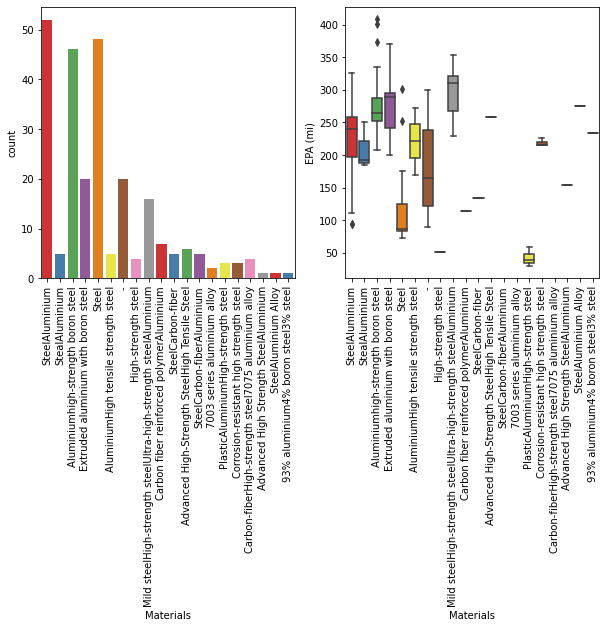

In [153]:
fig = plt.figure(figsize = (10,5))

ax1 = fig.add_subplot(1,2,1)
chart = sns.countplot(x='Materials', data = train_set, palette='Set1')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

ax2 = fig.add_subplot(1,2,2)
chart = sns.boxplot(x='Materials',y= 'EPA (mi)', data = train_set, palette='Set1')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)